#  <span style="color:orange">CNC機台銑刀磨損偵測</span>


**使用版本: PyCaret 2.2.1** <br />

# 1.0 學習目標

本課程使用 "pycaret.classification "模組來進行二元分類。
使用CNC機台銑刀磨損(CNC Mill Tool Wear)資料集。

將使用以下流程獲取資料、訓練模型與模型預測
### A. 初始化
* 獲取分析資料：使用pandas函式庫讀取檔案。
* 設置實驗環境：在PyCaret中設置實驗用以開始構建分類模型。

### B. 訓練模型
* 建構模型：建構模型，執行分層交叉驗證和評估分類指標。
* 調整模型：自動調整分類模型的超參數。

### C. 模型分析
* 分析模型性能：使用各種圖形分析模型性能。

### D. 模型運用
* 部署模型確定：在實驗結束時最終確定最佳模型。
* 模型預測：對未知的資料進行預測。


## 1.1 安裝 PyCaret 函式庫
`!pip install pycaret`


## 1.2 Pre-Requisites
- Python 3.6 或更新版本
- PyCaret 2.2.1 或更新版本
- 二元分類的基礎知識

## 1.3 For Google colab users:
若是要在 Google colab 執行，可使用下列程式碼開啟 notebook 圖形互動功能。<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`


In [1]:
!pip install pycaret

     |████████████████████████████████| 256kB 5.8MB/s 
     |████████████████████████████████| 148.9MB 72kB/s 
     |████████████████████████████████| 13.9MB 43.5MB/s 
     |████████████████████████████████| 66.3MB 113kB/s 
     |████████████████████████████████| 1.8MB 48.7MB/s 
     |████████████████████████████████| 174kB 46.3MB/s 
     |████████████████████████████████| 276kB 40.8MB/s 
     |████████████████████████████████| 266kB 46.6MB/s 
     |████████████████████████████████| 6.8MB 46.6MB/s 
     |████████████████████████████████| 102kB 11.6MB/s 
     |████████████████████████████████| 1.6MB 42.6MB/s 
     |████████████████████████████████| 337kB 43.6MB/s 
     |████████████████████████████████| 163kB 49.9MB/s 
     |████████████████████████████████| 1.1MB 39.4MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
     |████████████████████████████████| 153kB 37.4MB/s 
     |████████████████████████████████| 3.1MB 41.3M

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# 4.0 資料集說明

此課程，將使用來自__[kaggle](https://www.kaggle.com/shasun/tool-wear-detection-in-cnc-mill)__ 的名為“CNC機台銑刀磨損(CNC Mill Tool Wear)資料集”，此資料來自密西根大學系統級製造和自動化研究試驗台的CNC銑床上，在 2" x 2" x 1.5" 蠟塊上進行了一系列機加工實驗，成品如下：
![avatar](https://github.com/y-s-liu/machine-learning-tutorial/raw/master/datasets/CNC_Mill_Tool_Wear/test_artifact.jpg)

加工所收集的資料是的時間序列，從18次實驗中收集的，取樣率為100ms，分別記錄在experiment_01.csv到experiment_18.csv。共有48個特徵包含X、Y、Z軸和主軸的座標、轉速、加速度、電流、電壓、功率、回授電流和總線壓降，以及加工程式碼編號、加工工件編號、機台進給率與機台工序名稱等，標籤為是否換刀。在18次加工資料中，10筆為已破損需換刀(worn)，以及8筆為未破損無須換刀(unworn)。總計共有25286筆資料樣本與48個特徵。
<br>
每列的簡短描述如下：

- **ActualPosition:** X、Y、Z與S軸的座標。
- **ActualVelocity:**	X、Y、Z與S軸的轉速。
- **ActualAcceleration:** X、Y、Z與S軸的加速度。
- **CommandPosition:** X、Y、Z與S軸的指令座標。
- **CommandVelocity:** X、Y、Z與S軸的指令速度。
- **CommandAcceleration:** X、Y、Z與S軸的指令加速度。
- **CurrentFeedback:** X、Y、Z與S軸的回授電流。
- **DCBusVoltage:** X、Y、Z與S軸的直流總線電壓。
- **OutputCurrent:** X、Y、Z與S軸的輸出電流。
- **OutputVoltage:** X、Y、Z與S軸的輸出電壓。
- **OutputPower:** X、Y、Z與S軸的輸出功率。
- **OutputPower:** X、Y、Z與S軸的輸出功率。
- **OutputPower:** X、Y、Z與S軸的輸出功率。
- **OutputPower:** X、Y、Z與S軸的輸出功率。
- **OutputPower:** X、Y、Z與S軸的輸出功率。
- **CURRENT_PROGRAM_NUMBER:** 加工程式碼編號
- **sequence_number:** 加工工件編號
- **CURRENT_FEEDRATE:** 機台進給率
- **Machining_Process:** 機台正在執行的工序(分別為"Layer 1 Up", "Layer 1 Down", "Layer 2 Up", "Layer 2 Down", "Layer 3 Up", and "Layer 3 Down")
- **tool_condition:** 刀具條件(1 = 破損(worn), 0 = 無破損(unworn))

#### 資料集來源 :
[kaggle CNC Mill Tool Wear](https://www.kaggle.com/shasun/tool-wear-detection-in-cnc-mill)

# 5.0 獲取資料

可以從__[此處](https://www.kaggle.com/shasun/tool-wear-detection-in-cnc-mill/download)__找到的原始下載資料，然後使用pandas進行載入（了解操作方法）。
使用experiment_2,6,12,18.csv作為測試資料集，其餘為訓練資料集。

In [3]:
import pandas as pd
# training data set
frames = list()
url="https://raw.githubusercontent.com/y-s-liu/machine-learning-tutorial/master/datasets/CNC_Mill_Tool_Wear/train.csv"
results = pd.read_csv(url)
for i in [1, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]:
  exp = '0' + str(i) if i < 10 else str(i)
  frame = pd.read_csv("https://raw.githubusercontent.com/y-s-liu/machine-learning-tutorial/master/datasets/CNC_Mill_Tool_Wear/experiment_{}.csv".format(exp))
  row = results[results['No'] == i]
  frame['target'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
  frames.append(frame)
dataset = pd.concat(frames, ignore_index = True)
dataset.head()

# testing data set
frames = list()
for i in [2, 6, 12, 18]:
  exp = '0' + str(i) if i < 10 else str(i)
  frame = pd.read_csv("https://raw.githubusercontent.com/y-s-liu/machine-learning-tutorial/master/datasets/CNC_Mill_Tool_Wear/experiment_{}.csv".format(exp))
  row = results[results['No'] == i]
  frame['target'] = 1 if row.iloc[0]['tool_condition'] == 'worn' else 0
  frames.append(frame)
data_unseen = pd.concat(frames, ignore_index = True)

print('Data for Modeling: ' + str(dataset.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (17793, 49)
Unseen Data For Predictions: (7493, 49)


# 6.0 設定 PyCaret 環境

In [4]:
from pycaret.classification import *

In [5]:
exp_clf101 = setup(data = dataset, target = 'target', session_id=123) 

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(17793, 49)"
5,Missing Values,False
6,Numeric Features,47
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


# 7.0 比較所有模型(Comparing All Models)

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9944,0.9996,0.9947,0.9950,0.9949,0.9887,0.9887,0.529
catboost,CatBoost Classifier,0.9939,0.9998,0.9965,0.9924,0.9945,0.9877,0.9877,14.319
xgboost,Extreme Gradient Boosting,0.9937,0.9998,0.9956,0.9930,0.9943,0.9873,0.9874,2.857
rf,Random Forest Classifier,0.9876,0.9993,0.9939,0.9837,0.9887,0.9748,0.9749,2.294
dt,Decision Tree Classifier,0.9869,0.9867,0.9887,0.9875,0.9881,0.9736,0.9736,0.133
et,Extra Trees Classifier,0.9802,0.9978,0.9843,0.9798,0.9821,0.9601,0.9601,1.399
gbc,Gradient Boosting Classifier,0.9777,0.9983,0.9958,0.9648,0.9800,0.9548,0.9554,4.239
ada,Ada Boost Classifier,0.9663,0.9939,0.9813,0.9584,0.9696,0.9317,0.9321,0.986
knn,K Neighbors Classifier,0.7727,0.8567,0.7684,0.8081,0.7877,0.5435,0.5444,0.531
lr,Logistic Regression,0.6165,0.6715,0.6871,0.6406,0.6629,0.2195,0.2204,1.948


# 8.0 建立模型(Create a Model)

In [7]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9936,0.9996,0.9942,0.9942,0.9942,0.9870,0.9870
1,0.9944,0.9999,0.9898,1.0000,0.9949,0.9887,0.9887
2,0.9952,0.9999,0.9971,0.9942,0.9956,0.9903,0.9903
3,0.9960,0.9999,0.9956,0.9971,0.9963,0.9919,0.9919
4,0.9928,0.9997,0.9956,0.9913,0.9934,0.9854,0.9854
5,0.9920,0.9998,0.9971,0.9884,0.9927,0.9838,0.9838
6,0.9960,0.9999,0.9956,0.9971,0.9963,0.9919,0.9919
7,0.9976,0.9999,0.9971,0.9985,0.9978,0.9951,0.9951
8,0.9928,0.9982,0.9912,0.9956,0.9934,0.9854,0.9854
9,0.9936,0.9988,0.9942,0.9942,0.9942,0.9870,0.9870


# 9.0 調整模型(Tune a Model)

In [8]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9920,0.9997,0.9942,0.9913,0.9927,0.9838,0.9838
1,0.9960,0.9999,0.9956,0.9971,0.9963,0.9919,0.9919
2,0.9928,0.9998,0.9971,0.9898,0.9934,0.9854,0.9854
3,0.9936,0.9999,0.9971,0.9913,0.9942,0.9870,0.9870
4,0.9920,0.9996,0.9971,0.9884,0.9927,0.9838,0.9838
5,0.9896,0.9997,0.9956,0.9855,0.9905,0.9789,0.9790
6,0.9928,0.9998,0.9927,0.9941,0.9934,0.9854,0.9854
7,0.9952,0.9999,0.9956,0.9956,0.9956,0.9903,0.9903
8,0.9936,0.9997,0.9927,0.9956,0.9941,0.9870,0.9870
9,0.9880,0.9994,0.9912,0.9869,0.9891,0.9757,0.9757


# 10.0 各種圖形分析模型性能(Plot a Model)

### 10.1 AUC Plot

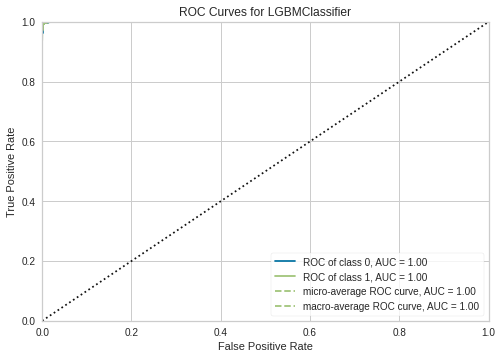

In [9]:
plot_model(tuned_lightgbm, plot = 'auc')

### 10.2 Precision-Recall Curve

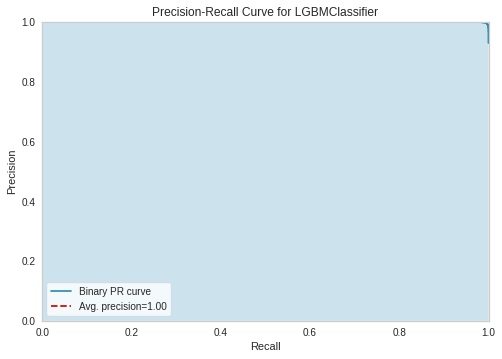

In [10]:
plot_model(tuned_lightgbm, plot = 'pr')

### 10.3 Feature Importance Plot

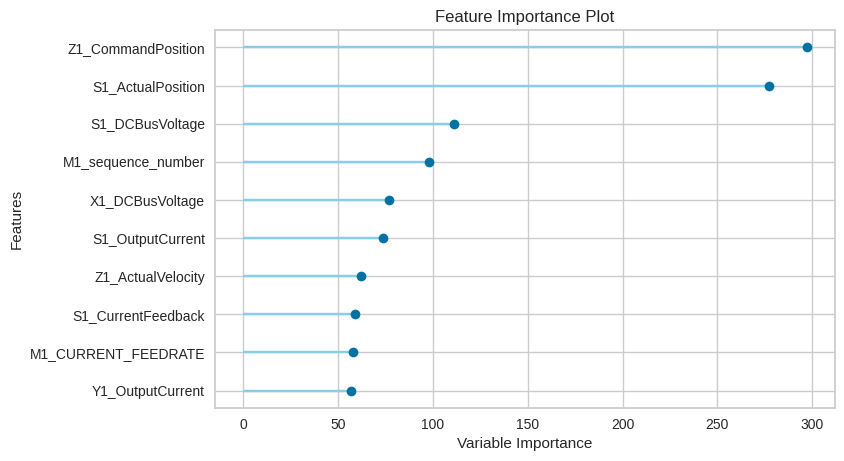

In [11]:
plot_model(tuned_lightgbm, plot='feature')

### 10.4 Confusion Matrix

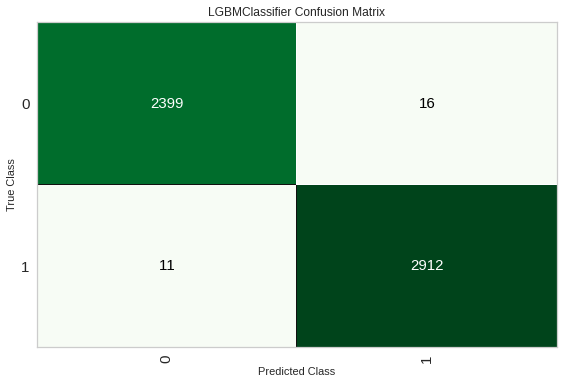

In [12]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

分析模型性能的另一種方法是使用`valuate_model`函式，該函式顯示給定模型的所有可用圖形的使用者界面。它在內部是使用`plot_model`函式。

# 11.0 預測測試資料樣本(Predict on test Sample)

In [13]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9949,0.9999,0.9962,0.9945,0.9954,0.9898,0.9898


# 12.0 部署模型確定(Finalize Model for Deployment)

In [14]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [15]:
predict_model(final_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process_End,Machining_Process_Layer 1 Down,Machining_Process_Layer 1 Up,Machining_Process_Layer 2 Down,Machining_Process_Layer 2 Up,Machining_Process_Layer 3 Down,Machining_Process_Layer 3 Up,Machining_Process_Prep,Machining_Process_Repositioning,Machining_Process_Starting,Machining_Process_end,target,Label,Score
0,0.000,0.000000,198.0,0.000000,-1.580,0.0312,328.0,1.070000,0.000001,158.000000,0.025,18.799999,0.00,0.00,-0.5800,0.0167,326.0,2.210000,1.090000e-06,0.000,0.00,119.000000,0.0,0.0,0.0,0.0,0.0,-1220.0,0.000000,0.250000,0.000000,0.000000e+00,-0.705000,2.770000e-19,327.0,2.890000e-06,12.0,1.0,0.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9959
1,0.050,25.000000,151.0,0.000000,0.238,0.0157,327.0,0.336000,0.000000,73.000000,0.025,12.500000,0.00,0.00,0.7000,0.0164,326.0,0.244000,0.000000e+00,-3.080,0.00,32.900002,0.0,0.0,0.0,0.0,0.0,1150.0,53.400002,44.400002,53.299999,0.000000e+00,20.100000,7.330000e-01,324.0,1.390000e-01,12.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9903
2,-0.150,-68.699997,141.0,0.000000,-3.090,0.0465,327.0,0.700000,0.000025,77.800003,0.025,0.000000,0.00,0.00,1.7600,0.0253,326.0,0.863000,0.000000e+00,0.025,12.50,55.700001,0.0,0.0,0.0,0.0,0.0,383.0,-0.002000,-0.250000,0.000000,0.000000e+00,0.213000,2.710000e-19,327.0,-4.860000e-06,12.0,1.0,0.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9993
3,1.900,25.000000,162.0,-2.730000,3.330,0.0797,327.0,6.450000,0.000279,104.000000,-2.280,6.250000,-2.39,-2.08,-3.1200,0.0905,325.0,10.900000,4.300000e-04,0.025,12.50,27.500000,0.0,0.0,0.0,0.0,0.0,-1600.0,53.400002,0.000000,53.299999,-9.540000e-07,19.100000,8.940000e-01,320.0,1.720000e-01,12.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9990
4,-0.025,-6.250000,198.0,0.000000,-1.740,0.0213,329.0,1.960000,-0.000001,158.000000,0.000,0.000000,0.00,0.00,0.0623,0.0147,327.0,1.590000,2.730000e-07,0.025,12.50,119.000000,0.0,0.0,0.0,0.0,0.0,-486.0,-0.001000,-0.500000,0.000000,0.000000e+00,0.863000,2.720000e-19,329.0,-3.150000e-06,12.0,1.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.9986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5333,-3.100,-6.250000,153.0,0.000000,-6.060,0.1020,327.0,9.980000,0.000671,103.000000,-0.150,-75.000000,0.00,0.00,3.9100,0.0600,326.0,5.640000,-1.780000e-05,0.000,0.00,29.700001,0.0,0.0,0.0,0.0,0.0,2040.0,53.400002,35.000000,53.299999,0.000000e+00,16.900000,7.230000e-01,322.0,1.380000e-01,12.0,1.0,35.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9990
5334,2.950,-175.000000,159.0,-99.900002,4.210,0.0645,324.0,8.380000,0.000376,77.800003,19.600,-37.500000,19.90,13.00,8.3600,0.1620,322.0,33.700001,6.810000e-03,0.000,6.25,27.700001,0.0,0.0,0.0,0.0,0.0,1710.0,53.299999,-41.900002,53.299999,9.540000e-07,19.200001,9.380000e-01,318.0,1.810000e-01,12.0,1.0,102.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.9997
5335,15.100,37.500000,149.0,0.000000,6.150,0.1220,324.0,26.799999,0.003900,105.000000,0.000,0.000000,0.00,0.00,-0.5490,0.0255,323.0,2.660000,0.000000e+00,0.025,12.50,28.700001,0.0,0.0,0.0,0.

# 13.0 預測未見過的資料集(Predict on unseen data)

In [16]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,target,Label,Score
0,198.0,0.0,0.0,198.0,0.0,0.0,-0.284,2.790000e-19,329.0,0.0,0.000000e+00,158.0,0.0,0.0,158.0,0.0,0.0,-0.0839,2.680000e-19,333.0,0.0,-1.470000e-06,119.0,0.000,0.00,119.0,0.0,0.0,0.0,0.0,0.0,0.0,-1160.0,0.00100,0.687,-1160.0,0.0,0.0,-1.860,0.000000e+00,332.0,0.0,0.000000e+00,12.0,1.0,2.0,50.0,Prep,0,0,0.9400
1,198.0,0.0,0.0,198.0,0.0,0.0,-0.284,2.790000e-19,329.0,0.0,0.000000e+00,158.0,0.0,0.0,158.0,0.0,0.0,-0.0839,2.680000e-19,333.0,0.0,-1.470000e-06,119.0,0.000,0.00,119.0,0.0,0.0,0.0,0.0,0.0,0.0,-1160.0,0.00100,0.687,-1160.0,0.0,0.0,-1.860,0.000000e+00,332.0,0.0,0.000000e+00,12.0,0.0,0.0,50.0,Prep,0,0,0.9400
2,198.0,0.0,0.0,198.0,0.0,0.0,1.170,2.780000e-19,325.0,0.0,9.160000e-07,158.0,0.0,0.0,158.0,0.0,0.0,-0.7090,2.690000e-19,327.0,0.0,6.770000e-07,119.0,0.000,0.00,119.0,0.0,0.0,0.0,0.0,0.0,0.0,905.0,0.00025,0.875,905.0,0.0,0.0,-0.176,2.780000e-19,324.0,0.0,-8.590000e-07,12.0,0.0,0.0,50.0,Prep,0,1,0.7545
3,198.0,0.0,0.0,198.0,0.0,0.0,-0.230,2.790000e-19,329.0,0.0,-2.300000e-07,158.0,0.0,0.0,158.0,0.0,0.0,-1.3400,2.680000e-19,333.0,0.0,0.000000e+00,119.0,-0.025,-6.25,119.0,0.0,0.0,0.0,0.0,0.0,0.0,-1160.0,0.00075,0.188,-1160.0,0.0,0.0,-1.170,0.000000e+00,332.0,0.0,-6.290000e-06,12.0,4.0,0.0,50.0,Prep,0,0,0.9466
4,198.0,0.0,0.0,198.0,0.0,0.0,-0.230,2.790000e-19,329.0,0.0,-2.300000e-07,158.0,0.0,0.0,158.0,0.0,0.0,-1.3400,2.680000e-19,333.0,0.0,0.000000e+00,119.0,-0.025,-6.25,119.0,0.0,0.0,0.0,0.0,0.0,0.0,-1160.0,0.00075,0.188,-1160.0,0.0,0.0,-1.170,0.000000e+00,332.0,0.0,-6.290000e-06,12.0,0.0,0.0,50.0,Prep,0,0,0.9466


In [17]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.target, unseen_predictions.Label, 'Accuracy')

0.8685